In [1]:
##여러 활성화 함수들
import numpy as np

In [2]:
#계단 함수

In [3]:
##float(실수)만 받는 계단 함수
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
##넘파이 배열도 받는 계단 함수
def step_function(x):
    y = x > 0
    return y.astype(np.int) 

In [5]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [6]:
y = x > 0
y

array([False,  True,  True])

In [7]:
y = y.astype(np.int) ##넘파이에서 자료형을 바꿔줄때 사용하는 메서드
y

array([0, 1, 1])

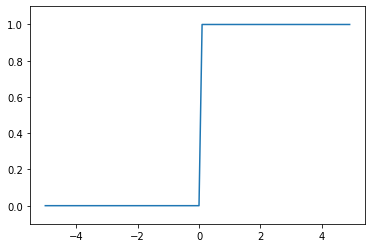

In [8]:
##계단 함수 그래프
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) #-5부터 5까지 0.1 간격의 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
##시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) ##exp(x) = 자연 상수를 뜻함

In [10]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [11]:
#넘파이 브로드캐스트 기능 확인하기

t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [12]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

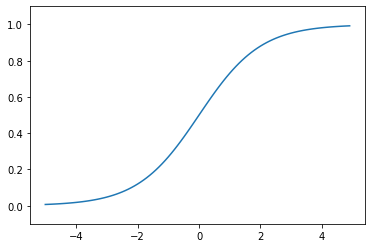

In [13]:
##시그모이드 함수 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [14]:
##ReLU 함수
def relu(x):
    return np.maximum(0, x) ##maximum은 두 입력 값 중 큰 값을 선택해 반환하는 함수

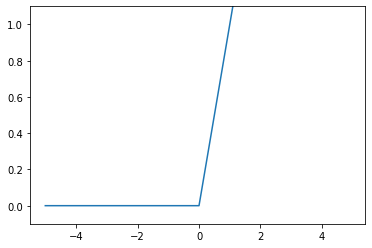

In [15]:
##ReLU 함수 그래프 그리기

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
##다차원 배열

#1차원 배열

A = np.array([1, 2, 3, 4])
print(A)

np.ndim(A) #배열의 차원 수 확인하기

print(A.shape) #배열의 형상 확인하기 (튜플 형태로 반환)

A.shape[0]

[1 2 3 4]
(4,)


4

In [17]:
#2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [18]:
##행렬 계산하기
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)  ##행렬의 곱을 계산하는 메서드 / 1차원이면 벡터, 2차원이면 행렬의 곱 계산

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [19]:
##형상이 다른 행렬의 곱
A = np.array([[1, 2, 3], [4, 5, 6]]) #2X3
B = np.array([[1, 2], [3, 4], [5, 6]]) #3X2

np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [20]:
##신경망에서 행렬의 곱

X = np.array([1, 2]) ##입력값 (0층)
W = np.array([[1, 3, 5], [2, 4, 6]]) ##가중치
Y = np.dot(X, W) ##출력값(1층)
print(Y)

[ 5 11 17]


In [21]:
##3층신경망 구현하기##

In [22]:
X = np.array([1.0, 0.5])  #입력값
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) ##가중치
B1 = np.array([0.1, 0.2, 0.3]) ##편향

print(W1.shape, X.shape, B1.shape)

A1 = np.dot(X, W1) + B1  ##1층의 첫 번째 노드 구하기

(2, 3) (2,) (3,)


In [23]:
##은닉층에서 활성화 함수로 시그모이드 사용
Z1 = sigmoid(A1)

print(A1,'\n', Z1)

[0.3 0.7 1.1] 
 [0.57444252 0.66818777 0.75026011]


In [24]:
##2층으로 가는 과정

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape,'\n',W2.shape,'\n',B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2,'\n', Z2)

(3,) 
 (3, 2) 
 (2,)
[0.51615984 1.21402696] 
 [0.62624937 0.7710107 ]


In [25]:
##출력층

def identitiy_function(x):
    return(x)

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identitiy_function(A3)
print(Y)

[0.31682708 0.69627909]


In [26]:
##3층 신경망 구현 정리

def init_network():
    network = {}  ##가중치와 편향 초기화
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  ##딕셔너리인 network에 가중치와 편향 저장
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):  ##입력에서 출력방향(순전파)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3  = np.dot(z2, W3) + b3
    y = identitiy_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [27]:
##소프트맥스 함수 구현하기
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) ##지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [28]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [29]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [30]:
##소프트맥스 함수화 하기
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [31]:
##소프트맥스의 큰 값으로 인한 오버플로 현상
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

array([nan, nan, nan])

In [32]:
##오버플로 해결하기
c = np.max(a)  ##c = 1010(최댓값)
a - c

array([  0, -10, -20])

In [33]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [34]:
##오버플로를 해결한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [35]:
##소프트맥스 함수 이용해 보기
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y, np.sum(y))

[0.01821127 0.24519181 0.73659691] 1.0


In [36]:
##손글씨 숫자 인식

In [37]:
##MNIST 데이터셋 불러오기

In [42]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

##각 데이터의 형상 출력

print(x_train.shape)
print(t_train.shape)
print(x_test.shape, '\n', t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784) 
 (10000,)


In [44]:
##MNIST데이터셋 불러보기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))  ##넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환하기
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) ##원래의 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [45]:
##신경망 구현을 위한 함수
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3  = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [47]:
##정확도 평가

x,t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  ##확률이 가장 높은 원소의 인덱스 얻기
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" +str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [49]:
##신경망 각 층의 형상 보기
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape, '\n', x[0].shape, '\n', W1.shape, '\n', W2.shape, '\n', W3.shape)

(10000, 784) 
 (784,) 
 (784, 50) 
 (50, 100) 
 (100, 10)


In [50]:
##배치처리 구현
x,t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy" + str(float(accuracy_cnt) / len(x)))

Accuracy0.9352
